# ORIE 4580/5580/5581 Assignment 4

#### Students: London Brown (LMB395) and Katie Zelvin (KLZ24)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans.

In [ ]:
#from example code
def plot_mean_and_ci(fig, data, alpha=0.95, plotCI=1):
    """
    Plot the mean and confidence interval (CI) for a dataset.

    Parameters:
    fig (matplotlib.figure.Figure): The figure object to draw on.
    data (numpy.ndarray): The dataset for which to calculate the mean and CI.
    alpha (float): The confidence level (e.g., 0.95 for a 95% CI).
    plotCI (int): Whether to plot the confidence interval (1 for yes, 0 for no).

    Returns:
    tuple: A tuple containing the mean and half-width of the CI.
    """
    mean = np.mean(data)

    # Calculate the z-score for the given confidence level alpha
    z = stats.norm.ppf(0.5 + alpha / 2.0)

    # Calculate the half-width of the CI
    half_width_alpha = z * np.std(data, ddof=1) / np.sqrt(len(data))

    # Calculate the upper and lower bounds of the CI
    ucb = mean + half_width_alpha
    lcb = mean - half_width_alpha

    # Plot the sample mean as a green vertical line
    plt.axvline(mean, color='g', label='sample mean', lw=2)

    # Plot the confidence interval as a yellow shaded region
    if plotCI:
        plt.axvspan(lcb, ucb, alpha=0.5, color='y', label=f'{int(alpha*100)}% confidence interval')

    return mean, half_width_alpha

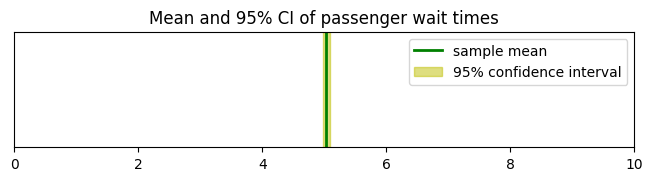

Estimate mean wait time: 5.03 minutes
95% confidence interval: +/-0.06 minutes


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(24)
num_passengers = 10000
arrival_times = np.random.uniform(0, 1000, num_passengers)
wait_times = (10 - (arrival_times % 10)) % 10
plt.figure(figsize=(8, 1.5))
mean_wait, ci_half_width = plot_mean_and_ci(plt.gcf(), wait_times, alpha=0.95, plotCI=1) #help from chatGPT with plotting
plt.xlim(0, 10)
plt.yticks([])
plt.title("Mean and 95% CI of passenger wait times")
plt.legend()
plt.show()

print(f"Estimate mean wait time: {mean_wait:.2f} minutes")
print(f"95% confidence interval: +/-{ci_half_width:.2f} minutes")

<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans.

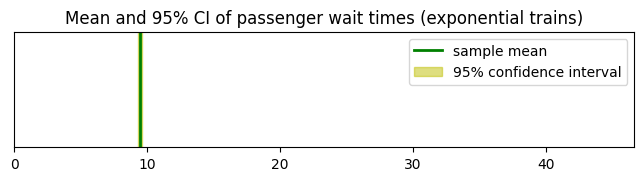

Estimate mean waiting time: 9.44 minutes
95% confidence interval: +/-0.17 minutes


In [ ]:
np.random.seed(24)
num_passengers = 10000
arrival_times = np.random.uniform(0, 1000, num_passengers)
arrival_times_sorted = np.sort(arrival_times)

np.random.seed(99)
train_times = []
current_time = 0
while current_time < 1000:
    inter_arrival = np.random.exponential(scale=10)
    current_time += inter_arrival
    train_times.append(current_time)
train_times = np.array(train_times)

indices = np.searchsorted(train_times, arrival_times_sorted, side='right') #chatgpt help with numpy search sorted
wait_times = train_times[indices] - arrival_times_sorted

plt.figure(figsize=(8, 1.5))
mean_wait, ci_half_width = plot_mean_and_ci(plt.gcf(), wait_times, alpha=0.95, plotCI=1)
plt.xlim(0, np.max(wait_times))
plt.yticks([])
plt.title("Mean and 95% CI of passenger wait times (exponential trains)")
plt.legend()
plt.show()

print(f"Estimate mean wait time: {mean_wait:.2f} minutes")
print(f"95% confidence interval: +/-{ci_half_width:.2f} minutes")

<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

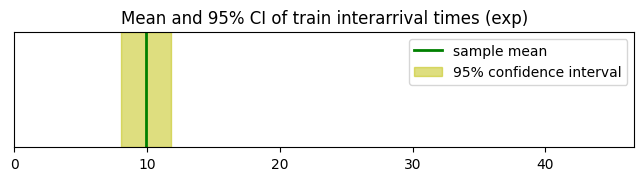

Estimate mean interarrival time: 9.91 minutes
95% confidence interval: +/-1.85 minutes


In [ ]:
inter_arrival_times = np.diff(train_times)

plt.figure(figsize=(8, 1.5))
mean_gap, gap_ci = plot_mean_and_ci(plt.gcf(), inter_arrival_times, alpha=0.95, plotCI=1)
plt.xlim(0, max(20, np.max(inter_arrival_times)))
plt.yticks([])
plt.title("Mean and 95% CI of train interarrival times (exp)")
plt.legend()
plt.show()

print(f"Estimate mean interarrival time: {mean_gap:.2f} minutes")
print(f"95% confidence interval: +/-{gap_ci:.2f} minutes")

<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.

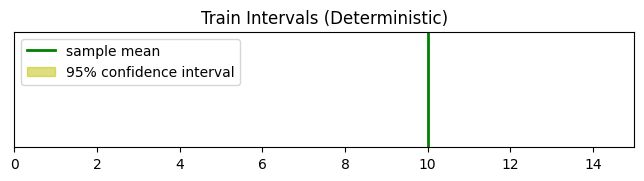

Average interval deterministic: 10.00 minutes
95% CI: +-0.00 minutes s


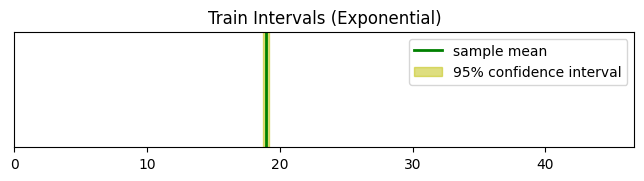

Average interval exponential: 18.96 mins
95% CI: +-0.23 mins


In [ ]:
train_times_det = np.arange(0, 1000 + 10, 10)

indices_det = np.searchsorted(train_times_det, arrival_times_sorted, side='right')

passenger_intervals_det = train_times_det[indices_det] - train_times_det[indices_det - 1]

passenger_intervals_det = passenger_intervals_det[~np.isnan(passenger_intervals_det)]

plt.figure(figsize=(8, 1.5))
mean_det, ci_det = plot_mean_and_ci(plt.gcf(), passenger_intervals_det, alpha=0.95, plotCI=1)
plt.xlim(0, 15)
plt.yticks([])
plt.title("Train Intervals (Deterministic)")
plt.legend()
plt.show()

print(f"Average interval deterministic: {mean_det:.2f} minutes")
print(f"95% CI: +-{ci_det:.2f} minutes s")

indices_exp = np.searchsorted(train_times, arrival_times_sorted, side='right')
passenger_intervals_exp = np.full_like(arrival_times_sorted, np.nan, dtype=float)
valid_indices = indices_exp > 0
passenger_intervals_exp[valid_indices] = train_times[indices_exp[valid_indices]] - train_times[indices_exp[valid_indices] - 1]

passenger_intervals_exp = passenger_intervals_exp[~np.isnan(passenger_intervals_exp)] #chatgpt help with removing NAN

plt.figure(figsize=(8, 1.5))
mean_exp, ci_exp = plot_mean_and_ci(plt.gcf(), passenger_intervals_exp, alpha=0.95, plotCI=1)
plt.xlim(0, np.max(passenger_intervals_exp))
plt.yticks([])
plt.title("Train Intervals (Exponential)")
plt.legend()
plt.show()

print(f"Average interval exponential: {mean_exp:.2f} mins")
print(f"95% CI: +-{ci_exp:.2f} mins")


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

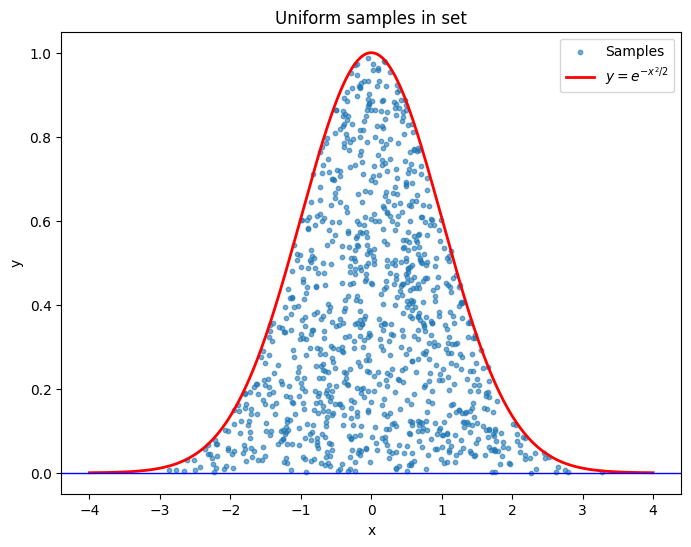

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
X = np.random.randn(n)
U = np.random.rand(n)
Y = U * np.exp(-X**2 / 2)

plt.figure(figsize=(8,6))
plt.scatter(X, Y, s=10, alpha=0.6, label="Samples")
x = np.linspace(-4, 4, 400) #reasonable bounds
plt.plot(x, np.exp(-x**2/2), 'r-', lw=2, label=r"$y = e^{-x^2/2}$")
plt.axhline(0, color='blue', lw=1)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Uniform samples in set")
plt.legend()
plt.show()


<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

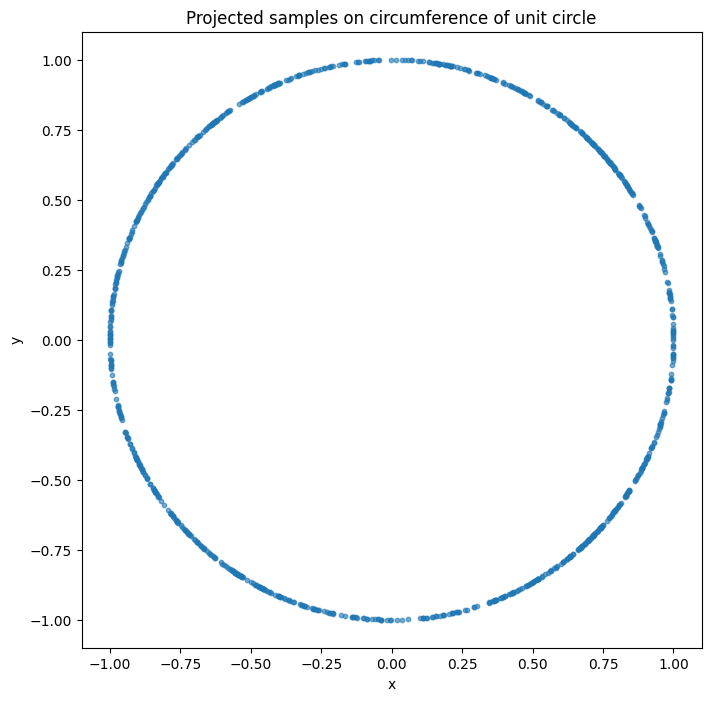

In [ ]:
N = 1000
np.random.seed(24)

U = np.random.uniform(-1, 1, N)
V = np.random.uniform(-1, 1, N)

R = np.sqrt(U**2 + V**2)
X = U / R
Y = V / R

plt.figure(figsize=(8,8))
plt.scatter(X, Y, s=10, alpha=0.6)
circle = plt.Circle((0,0), 1, color="blue", fill=False)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Projected samples on circumference of unit circle")
plt.show()

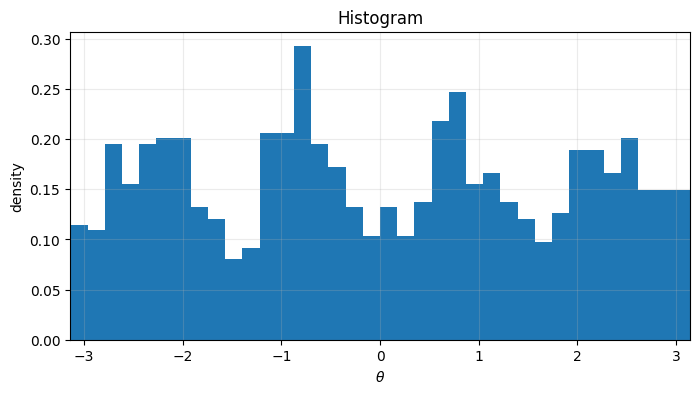

In [ ]:
theta = np.arctan2(Y, X)

plt.figure(figsize=(8,4))
plt.hist(theta, bins=36, density=True)
plt.xlabel(r'$\theta$')
plt.ylabel('density')
plt.title('Histogram')
plt.grid(alpha=0.25)
plt.xlim(-np.pi, np.pi)
plt.show()

They do not appear to be evenly distributed according to the histogram.

<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

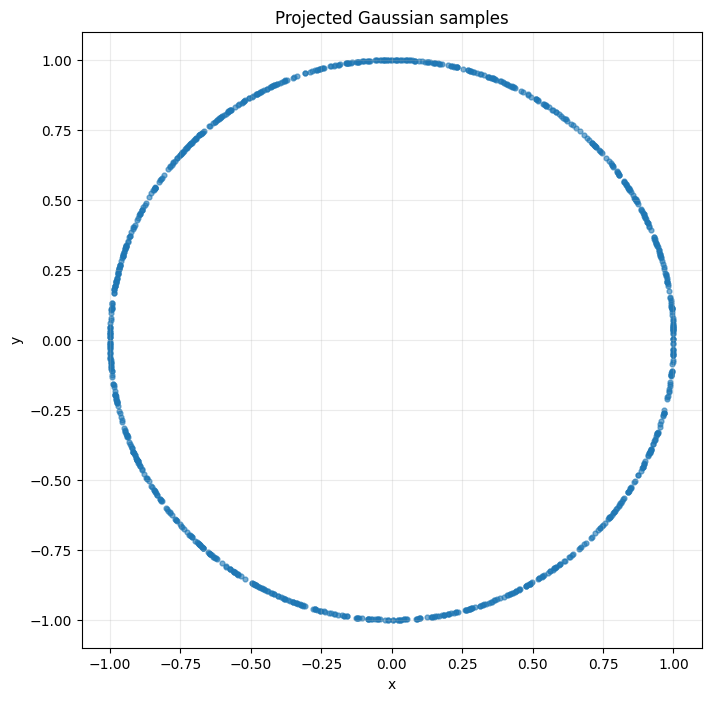

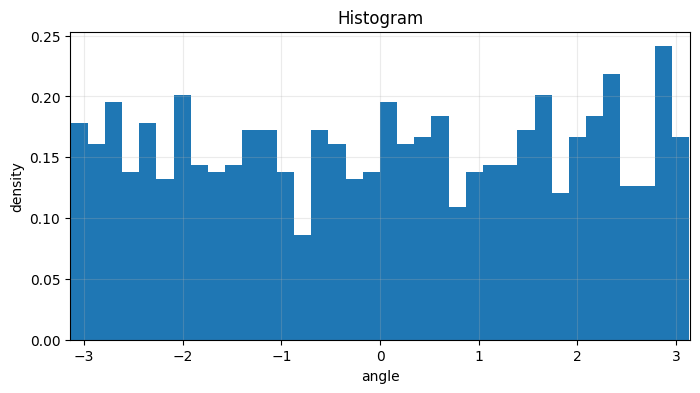

In [ ]:
np.random.seed(0)
N = 1000
Z = np.random.randn(N)
W = np.random.randn(N)

R = np.sqrt(Z**2 + W**2) + 1e-12
X = Z / R
Y = W / R

plt.figure(figsize=(8,8))
plt.scatter(X, Y, s=12, alpha=0.6)
circle = plt.Circle((0,0), 1, fill=False, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Projected Gaussian samples")
plt.grid(alpha=0.25)
plt.show()

theta = np.arctan2(Y, X)
plt.figure(figsize=(8,4))
plt.hist(theta, bins=36, density=True)
plt.xlabel("angle")
plt.ylabel("density")
plt.title("Histogram")
plt.xlim(-np.pi, np.pi)
plt.grid(alpha=0.25)
plt.show()

The histogram now appears more even than previously, though there are still bumps. Since there are only 1000 samples this makes sense.

<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


<hr>

## Ans.
All three instruments are independent, so the probability that all three financial products simultaneously yield a positive return is $P(All 3 >0) = P(US Stocks > 0)*P(US Bonds >0)*P(EM Bonds >0)$. . For each instrument, $P(X>0)=P(Z > \frac{0-\mu_i}{\sigma_i})=1-Φ(\frac{0-\mu_i}{\sigma_i})=Φ(\frac{\mu_i}{\sigma_i})$. So $P(US Stocks >0)=\Phi({\frac{0.14}{0.25}})=\Phi(0.56)=0.7123$ (from Z-table found online). Similarly,  $P(US Bonds >0)=\Phi({\frac{0.07}{0.1}})=\Phi(0.7)=0.7580$, and  $P(EM Bonds >0)=\Phi({\frac{0.16}{0.3}})=\Phi(0.53)=0.70194$. So, $P(All 3 >0)= 0.7123*0.7580*0.70194=0.37899$ or about $37.90\%$


<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.



In [ ]:
import numpy as np
from scipy.linalg import cholesky

np.random.seed(395)
mu = np.array([0.14, 0.07, 0.16])
sigma = np.array([[0.0625, -0.01, 0.0375], [-0.01, 0.01, -0.015], [0.0375, -0.015, 0.09]])
L= cholesky(sigma, lower=True)
sims=1000000
# help from ChatGPT and Demo 6 code for the code below
Z = np.random.randn(sims, 3)
X = np.dot(Z, L.T) + mu
probability = np.mean(np.all(X > 0, axis=1))
print(f"P(All 3 >0)= {probability:.4f}")


P(All 3 >0)= 0.3694


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.
For a uniform r.v., $\mathbb{E}[X]=\frac{α+β}{2}$ and $Var(X) = \frac{(\beta-\alpha)^2}{12}$. So, $\frac{α+β}{2}=0$ and $\frac{(\beta-\alpha)^2}{12}=1$. Then $\alpha + \beta = 0$ and $\beta=-\alpha and \beta-\alpha=-\alpha-\alpha=-2\alpha$. Plugging this into the variance equations, $ \frac{(-2\alpha)^2}{12}=1$ becomes $\frac{4\alpha^2}{12}=1$. Simplifying, $\frac{\alpha^2}{3}=1$ then $\alpha^2=3$. Then we can see that $\alpha = -\sqrt{3}$ and $\beta=\sqrt{3}$ ($\alpha$ is the negative one because it comes first in $[\alpha,\beta]$).

<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

## Ans.
$X_1,X_2\sim Uniform[-\sqrt{3}, \sqrt{3}]$By law of total expectation, $\mathbb{E}[V_2]=\mathbb{E}[V_2|B=0]P(B=0)+\mathbb{E}[V_2|B=1]P(B=1)$. When B=0, $V_2 = X_1$, so $\mathbb{E}[V_2|B=0]=\mathbb{E}[X_1]=0$.  When B=1, $V_2 = X_2$, so $\mathbb{E}[V_2|B=1]=\mathbb{E}[X_2]=0$. Then $\mathbb{E}[V_2]=0(1-p)+0*p=0$. By law of total variance, $Var(V_2)=\mathbb{E}[Var(V_2|B)]+Var(\mathbb{E}[V_2|B])$. $Var(V_2|B=0)=Var(X_1)=1$ and $Var(V_2|B=1)=Var(X_2)=1$ so $\mathbb{E}[Var(V_2|B)]=1(1-p)+1p=1$. From earlier, $\mathbb{E}[V_2|B=0]=\mathbb{E}[X_1]=0$ and $\mathbb{E}[V_2|B=1]=\mathbb{E}[X_2]=0$. So $Var(\mathbb{E}[V_2|B])=0$ and $Var(V_2)=1+0=1$.

<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

## Ans.
$Cov(V_1, V_2 )= Cov(X_1, (1-B)X_1+BX_2)$ so by linearity of covariance, $Cov(V_1, V_2 )=Cov(X_1, (1-B)X_1)+Cov(X_1,BX_2)$. Evaluating the first term, $Cov(X_1, (1-B)X_1)=\mathbb{E}[1-B]Var(X_1)=(1-p). $ For the second term, $Cov(X_1, BX_2)=0$ because B is independnet of $X_1$ and $X_2$. So, $Cov(V_1, V_2 ) = (1-p)+0=1-p$. Solving for p to get $Cov(V_1, V_2 )=\sigma_{12}$, $p=1-\sigma_{12}$ (for $\sigma_{12}\geq 0$)


<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

## Ans.

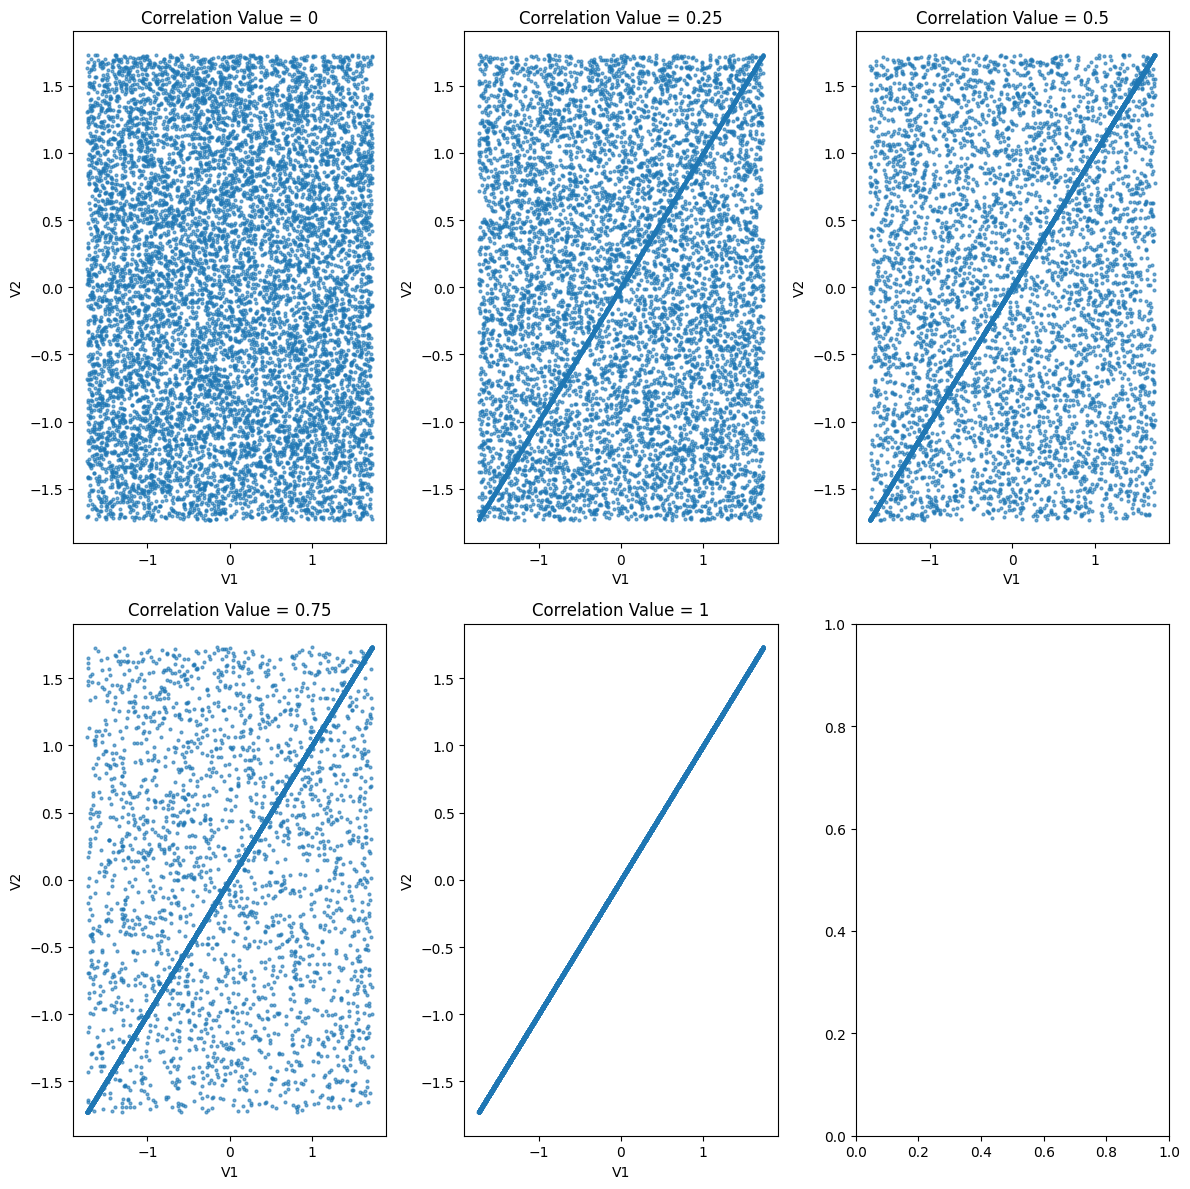

In [ ]:
import matplotlib.pyplot as plt
def correlated_uniform(sims, sigma):
   alpha = -np.sqrt(3)
   beta = np.sqrt(3)
   p = 1-sigma
   X1 = np.random.uniform(alpha, beta, sims)
   X2 = np.random.uniform(alpha, beta, sims)
   B = np.random.binomial(1, p, sims)  #help from Gemini suggestions
   V1 = X1
   V2 = (1-B)*X1 + B*X2
   return V1, V2
np.random.seed(395)
sims = 10000
corr_values = [0,0.25,0.5,0.75,1]
#help from Demo 6 code below
fig, axes = plt.subplots(2, 3, figsize=(12,12))
axes = axes.flatten()
for i, sigma in enumerate(corr_values): #help from Gemini suggestions for this line
   V1, V2 = correlated_uniform(sims, sigma)
   axes[i].scatter(V1, V2, s=4, alpha=0.6)
   axes[i].set_xlabel("V1")
   axes[i].set_ylabel("V2")
   axes[i].set_title(f"Correlation Value = {sigma}")
plt.tight_layout()
plt.show()


<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

In [ ]:
sigma=0.5
np.random.seed(395)
sims = 10000
V1, V2 = correlated_uniform(sims, sigma)
probability = np.mean((V1 <= 0) & (V2 <= 0))
print(f"P[V1<=0, V2<=0]={probability}")

P[V1<=0, V2<=0]=0.3774


<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.
$W_1$ and $W_2$ are uniform on $[\alpha,\beta]$. If Z is N(0,1) then $\Phi(Z)$ is Uniform[0,1]. This is because $\Phi(.)$ denotes the 1-d normal cdf, producing independent uniform marginals. By linear transformation, if U~Unif[0,1], then $\alpha+(\beta-\alpha)U\backsim Unif[\alpha,\beta]$. So, $W_1 = \alpha + (\beta-\alpha)\phi(Z_1) \backsim Unif[\alpha, \beta]$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2) \backsim Unif[\alpha, \beta]$. Hence, $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$ by part a.

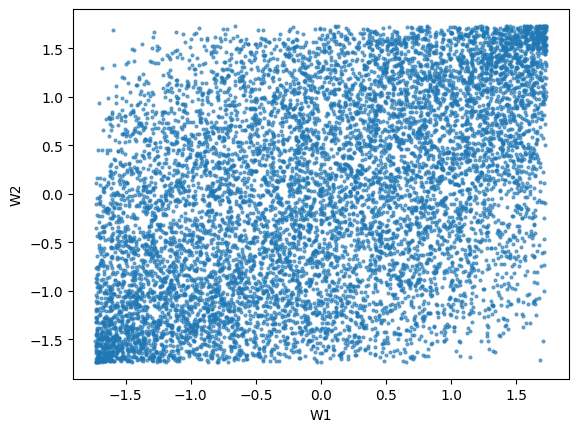

P[W1>=0, W2>=0]=0.3308


In [ ]:
from scipy.stats import norm
def copula(sims, sigma):
  alpha = -np.sqrt(3)
  beta = np.sqrt(3)
  sigma = np.array([[1, 0.5], [0.5, 1]])
  L = cholesky(sigma, lower=True)
  Z = np.random.randn(sims, 2)
  X = np.dot(Z, L.T)
  #help from Claude for below
  U1 = norm.cdf(X[:,0])
  U2=norm.cdf(X[:,1])
  W1 = alpha + (beta - alpha) * U1
  W2 = alpha + (beta - alpha) * U2
  return W1, W2

np.random.seed(395)
sims =10000
W1, W2 = copula(sims, sigma)

plt.scatter(W1, W2, s=4, alpha=0.6)
plt.xlabel("W1")
plt.ylabel("W2")
plt.show()
probability = np.mean((W1 >= 0) & (W2 >= 0))
print(f"P[W1>=0, W2>=0]={probability}")